## P1 Random Forest

In [1]:
# Importing all the necessary packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Loading in our dataset
df = pd.read_csv('csv_files/p1_comp2_final_use.csv', index_col=0)
df.head()

,X1,X2,X3,X4,X5_Age_Bins,X6_Payment_Bins,X7_Payment_Bins,X8_Payment_Bins,X9_Payment_Bins,X10_Payment_Bins,...,X17_abs,X17_sign,X17_monthlydif,X18_binary,X19_binary,X20_binary,X21_binary,X22_binary,X23_binary,Y
1,0.462160,2,2,1,1,2,2,1,1,2,...,0.299742,0,1,0,1,0,0,0,0,1
2,0.394132,2,2,2,1,1,2,2,2,2,...,0.504505,1,1,0,1,1,1,0,1,1
3,0.278693,2,2,2,2,2,2,2,2,2,...,0.624888,1,1,1,1,1,1,1,1,0
4,0.278693,2,2,1,2,2,2,2,2,2,...,0.540601,1,1,1,1,1,1,1,1,0
5,0.278693,1,2,1,3,1,2,1,2,2,...,0.548885,1,1,1,1,1,1,1,1,0


In [3]:
# Splitting up our data into variable and target data
X = df.iloc[:, :-1] # Variable
Y = df.Y # Target

In [4]:
# import the RandomOverSampler package from imblearn 
from imblearn.over_sampling import RandomOverSampler

# define the model
ros = RandomOverSampler(random_state=2019)

# fit the training data only to the RandomOverSampler model
# this will help address the imbalanced nature of the target variable 
X_resample, Y_resample = ros.fit_resample(X, Y)

In [14]:
# save features and targets from the 'iris'
features, targets = X_resample, Y_resample

models = []
#models.append(('LogisticRegression', LogisticRegression(solver='liblinear')))
#models.append(('KNeighborsClassifier', KNeighborsClassifier()))
#models.append(('SVC', SVC(kernel='rbf',gamma='auto')))
# models.append(('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=22)))
#models.append(('AdaBoostClassifier', AdaBoostClassifier()))
#models.append(('XGBoost', xgb.XGBClassifier()))
models.append(('Random Forest:', RandomForestClassifier(n_estimators=100, max_depth=20, max_features=10, random_state=2019)))

# KFold with 'stratify' option, F1 Score
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=2019)
for name, model in models:
    score = cross_val_score(model, features, targets, cv=cv, scoring='f1')
    print("Model:{0}, F1 Score: mean={1:0.5f}, var={2:0.5f}".format(name, score.mean(), score.var()))
    

    
# KFold with 'stratify' option, AUC Score
cv1 = StratifiedKFold(n_splits=10, shuffle=True, random_state=2019)
for name, model in models:
    score = cross_val_score(model, features, targets, cv=cv1, scoring='roc_auc')
    print("Model:{0}, AUC Score: mean={1:0.5f}, var={2:0.5f}".format(name, score.mean(), score.var()))

Model:Random Forest:, F1 Score: mean=0.87764, var=0.00012
Model:Random Forest:, AUC Score: mean=0.95396, var=0.00009


In [12]:
# Tao's code 
# define the feature importance variable 
# use the feature importance values from the decision tree above, sort in descending order 
feature_imp = pd.Series(forest.feature_importances_,index=df.iloc[:,:-1].columns).sort_values(ascending=False)

# print the results 
feature_imp

AttributeError: 'list' object has no attribute 'feature_importances_'

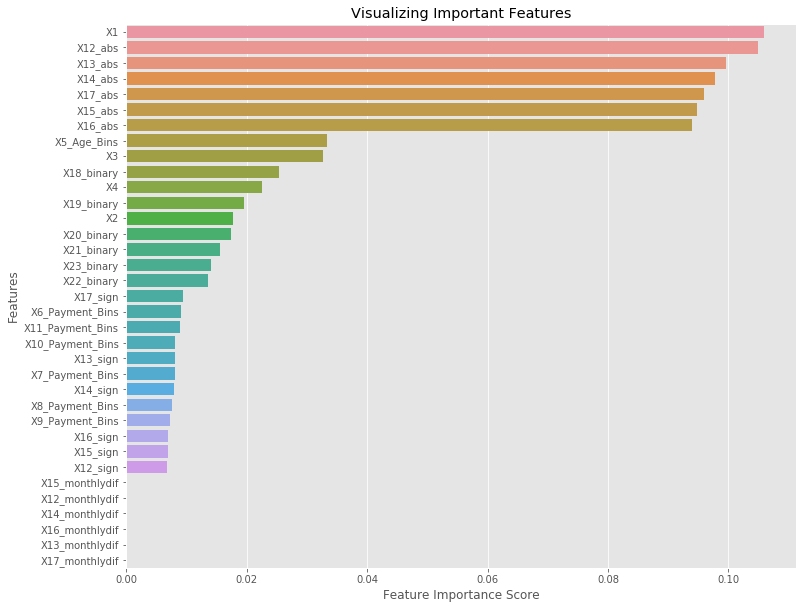

In [16]:
# Tao's code 
# visualize the feature importance values 
# not required but it helps to reinforce the differences between the features 

#import packages needed for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# define the plot style 
plt.style.use('ggplot')

# define the figure size - makes the readability of the graph better 
plt.figure(figsize=(12,10))

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

In [25]:
df2 = df.filter(['X1','X12_abs','X13_abs','X14_abs','X15_abs','X16_abs','X17_abs','X5_Age_Bins','X3','X18_binary','X4',
                 'X19_binary','X2','X20_binary','X21_binary','Y'])
df2.head()

,X1,X12_abs,X13_abs,X14_abs,X15_abs,X16_abs,X17_abs,X5_Age_Bins,X3,X18_binary,X4,X19_binary,X2,X20_binary,X21_binary,Y
1,0.462160,0.254647,0.223035,0.263688,0.290989,0.304190,0.299742,1,2,0,1,1,2,0,0,1
2,0.394132,0.564642,0.448502,0.452565,0.476099,0.495666,0.504505,1,2,0,2,1,2,1,1,1
3,0.278693,0.661384,0.676951,0.695869,0.597409,0.617907,0.624888,2,2,1,2,1,2,1,1,0
4,0.278693,0.375754,0.331617,0.625711,0.540253,0.538296,0.540601,2,2,1,1,1,2,1,1,0
5,0.278693,0.734650,0.715994,0.732991,0.526616,0.542693,0.548885,3,2,1,1,1,1,1,1,0


In [26]:
# Splitting our data set into X (variable) and Y (target)
X2, Y2 = df2.iloc[:,:-1],df2.iloc[:,-1]

# Splitting our data into training and test sets before creating the model
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=2019)

In [27]:
#Create a Gaussian Classifier
forest_2 = RandomForestClassifier(n_estimators=100, random_state=2019)

#Train the model using the training sets y_pred=forest_2.predict(X_test)
forest_2.fit(X2_train,Y2_train)

y2_pred = forest_2.predict(X2_test)

In [28]:
## Looking to see how well the model was able to predict the correct values
print(classification_report(Y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      7048
           1       0.36      0.06      0.11      1952

   micro avg       0.77      0.77      0.77      9000
   macro avg       0.57      0.52      0.49      9000
weighted avg       0.70      0.77      0.70      9000

